In [1]:
import numpy as np
import grape as utils
from scipy.linalg import expm
import matplotlib.pyplot as plt
import copy
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [28]:
nions=1
max_amp = 2 * np.pi * 25e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,1/300)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

tau = 40e-6
nsegments = 200
del_t = tau/nsegments 
x0 = np.random.rand(nsegments*2);
# x0 = result.x
# x2 = np.load('x120s_optimized.npy'); 
# x0 = utils.smooth_pulse(x2,60,2)
# x0 = np.load('x30s_optimized.npy'); 
# x0 = np.asarray([-2.94650661e-01,  8.18969715e-01, -8.72864686e-01, -6.51449500e-01,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.05380167e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for no rfi, 5, 12e-6, fun 1.6681861447764845e-07
# x1 = np.repeat(x2,10)
# x0 = utils.smooth_pulse(x1,50,2)

# rfi=[1]+np.linspace(0,1/300,5).tolist()
rfi=[1]
# rfi=[1.01,1,0.99]
print(utils.calc_fidelity6_ct(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity6_ct,
         x0=x0,
         jac=utils.calc_grad2,
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='L-BFGS-B',
         options={'disp':True, 'gtol':1e-16 },
         bounds=bnd,
        )
result

5406.807056957714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          400     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40681D+03    |proj g|=  8.06150D-04

At iterate    1    f=  5.39352D+03    |proj g|=  8.07843D-04
  ys=-2.302E-07  -gs= 1.100E-04 BFGS update SKIPPED

At iterate    2    f=  9.02186D+01    |proj g|=  2.40858D-04

At iterate    3    f=  1.44898D+00    |proj g|=  2.91409D-05

At iterate    4    f=  5.58850D-01    |proj g|=  2.04109D-05

At iterate    5    f=  1.26198D-01    |proj g|=  7.25992D-06

At iterate    6    f=  5.38805D-02    |proj g|=  5.13742D-06

At iterate    7    f=  1.53392D-04    |proj g|=  3.33876D-07

At iterate    8    f=  3.89630D-06    |proj g|=  5.24427D-08

At iterate    9    f=  1.40499D-08    |proj g|=  3.11678D-09

At iterate   10    f=  1.99840D-11    |proj g|=  1.29629D-10

At iterate   11    f=  5.55112D-12    |proj g|=  2.56790D-12

           * * *



  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5.551115123125783e-12
        x: [ 3.428e-01  5.166e-01 ...  2.793e-01  4.452e-01]
      nit: 11
      jac: [-1.060e-12 -1.061e-12 ... -1.749e-12 -1.752e-12]
     nfev: 21
     njev: 21
 hess_inv: <400x400 LbfgsInvHessProduct with dtype=float64>

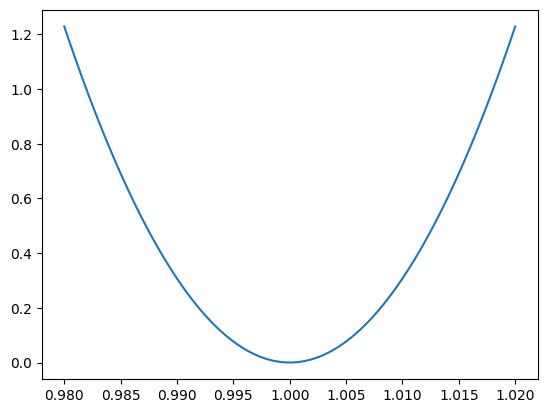

In [27]:
rfi_range = np.linspace(0.98,1.02,100)
infid=[]
for rfiv in rfi_range:
    infid.append(utils.calc_fidelity6_ct(result.x, nsegments, [rfiv], ssx, ssy, utarg, del_t, nions, max_amp))

plt.plot(rfi_range,infid)

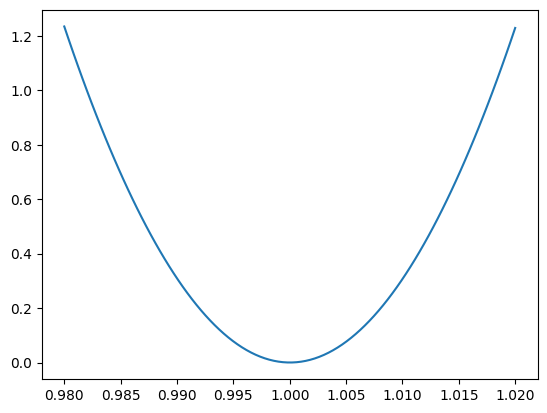

In [25]:
rfi_range = np.linspace(0.98,1.02,100)
infid=[]
for rfiv in rfi_range:
    infid.append(utils.calc_fidelity6_ct(result.x, nsegments, [rfiv], ssx, ssy, utarg, del_t, nions, max_amp))

plt.plot(rfi_range,infid)

In [17]:
Uf = utils.calc_uf(result.x, nsegments, rfi, ssx, ssy, del_t,nions, max_amp)
Uf[0][-1]

array([[ 7.07106782e-01+1.70636726e-09j,  1.36089141e-09-7.07106781e-01j],
       [-1.36089141e-09-7.07106781e-01j,  7.07106782e-01-1.70636726e-09j]])

In [8]:
print(utils.calc_fidelity5(result.x , nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity5(result.x*1/300 , nsegments, np.asarray([[1,1]]) , ssx, ssy, np.eye(2), del_t, nions, max_amp))


-8.881784197001252e-12
0.03437470989409164


In [14]:
nions=1
max_amp = 2 * np.pi * 25e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,1/300)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2)
rffull = np.linspace(0,1/300,50); rffull[0]=1

nsegments = 120
del_t = 0.25e-6

numrfi_add = 2
for j in range(1,10):
        if j==1:
                # x0 = np.load('x120s_optimized.npy') 
                x0 = result.x 
        else:
                x0 = result.x
                
        rfi=rffull[0:numrfi_add*j+1].tolist()
        print(f"running for {j}")
        print(rfi)
        result = minimize(utils.calc_fidelity6_ct,
         x0=x0,
         jac=utils.calc_grad2,
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='BFGS',
         options={'disp':True, 'gtol':1e-9},
        )
        result

running for 1
[1.0, 6.802721088435374e-05, 0.00013605442176870748]
         Current function value: 0.000024
         Iterations: 0
         Function evaluations: 46
         Gradient evaluations: 34


/Users/katiyar/opt/anaconda3/envs/oneQgate/lib/python3.12/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [35]:
# one point optimization
print(utils.calc_fidelity6_ct(result.x, nsegments, [1], ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity6_ct(result.x, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))


2.220446049250313e-12
0.002052226979465388


In [51]:
# two point optimization
print(utils.calc_fidelity6_ct(result.x, nsegments, [1], ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity6_ct(result.x, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))

2.1122336556955723
0.7895345174480095


In [16]:
xx = np.load('x120s_optimized.npy')
print(utils.calc_fidelity6_ct(xx, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))


0.13166070319314827
